In [1]:
import json
# dt_log = json.load(open('/home/chendian/BBCM/checkpoints/b_sighan_only_dynamic/dynamic_training.log', 'r'))
# dt_log = json.load(open('/home/chendian/BBCM/checkpoints/b_bbcm_fix/dynamic_training.log', 'r'))
# dt_log = json.load(open('/home/chendian/BBCM/checkpoints/b_bbcm_dynamic/dynamic_training.log', 'r'))

In [17]:
!ls -lht /home/chendian/BBCM/checkpoints/

total 128K
drwxrwxr-x 2 chendian chendian 4.0K Aug 18 02:17 b_sighan_fixP_sameseed
drwxrwxr-x 2 chendian chendian 4.0K Aug 18 02:14 b_sighan_dynamicP_sameseed
drwxrwxr-x 2 chendian chendian 4.0K Aug 17 08:29 b_bbcm_fixP_sameseed
drwxrwxr-x 2 chendian chendian 4.0K Aug 17 08:26 b_bbcm_dynamicP_sameseed
drwxrwxr-x 2 chendian chendian 4.0K Aug 14 07:50 b_bbcm_fixP_v2
drwxrwxr-x 2 chendian chendian 4.0K Aug  7 06:42 b_bbcm_fixP
drwxrwxr-x 2 chendian chendian 4.0K Aug  4 03:24 b_sighan_fixP
drwxrwxr-x 2 chendian chendian 4.0K Aug  3 09:40 b_bbcm_dynamicP
drwxrwxr-x 2 chendian chendian 4.0K Aug  2 03:16 b_sighan_dynamicP
drwxrwxr-x 2 chendian chendian 4.0K Jul 30 12:32 b_sighan_only_fixP
drwxrwxr-x 2 chendian chendian 4.0K Jul 30 10:47 b_sighan_only_dynamicP
drwxrwxr-x 2 chendian chendian 4.0K Jul 30 07:24 b_bbcm_dynamic
drwxrwxr-x 2 chendian chendian 4.0K Jul 30 07:24 b_bbcm_fix
drwxrwxr-x 2 chendian chendian 4.0K Jul 28 09:51 b_sighan_only_dynamic
drwxrwxr-x 2 chendian chendian 4.0K Jul 27

In [4]:
import math
import json
import numpy as np

def get_heatmap_arr(dt_log_path, method='asc', key='det_f1'):
    # file_name = '/home/chendian/BBCM/checkpoints/b_bbcm_dynamic/dynamic_training.log'
    dt_log = json.load(open(dt_log_path, 'r'))
    
    arr = np.ones([10, 11]) * 0.5
    mask = np.ones([10, 11])
    max_met_len = 0
    for round_idx, met_list in dt_log.items():
        met_len = len(met_list)
        max_met_len = 11
        for dataset_idx, recs in enumerate(met_list):
            for rec in recs:
                for k, v in rec.items():
                    # if k == 'det_f1':
                    # if k == 'cor_f1':
                    if k == key:
                        if dataset_idx == met_len - 1:
                            arr[int(round_idx), 0] = v
                            mask[int(round_idx), 0] = 0
                        else:
                            # arr[int(round_idx), met_len - 1 - dataset_idx] = v
                            # mask[int(round_idx), met_len - 1 - dataset_idx] = 0
                            if method == 'asc':
                                arr[int(round_idx), dataset_idx + 1] = v
                                mask[int(round_idx), dataset_idx + 1] = 0
                            elif method == 'desc':
                                arr[int(round_idx), dataset_idx] = v
                                mask[int(round_idx), dataset_idx] = 0
    return arr[:, :max_met_len], mask[:, :max_met_len]

In [10]:
dir_name = "cdsmb_bbcm_dynamicP"
# dir_name = "SoftMaskedBert_0912"
get_heatmap_arr(f'/home/chendian/BBCM/checkpoints/{dir_name}/dynamic_training.log')

(array([[0.08      , 0.29744848, 0.29353892, 0.29285586, 0.29358051,
         0.29390471, 0.29328583, 0.29265999, 0.29382047, 0.29432211,
         0.29381396],
        [0.0879397 , 0.40639992, 0.41544402, 0.40406918, 0.40366304,
         0.40410736, 0.40279196, 0.40332061, 0.40421914, 0.40436725,
         0.40439957],
        [0.11152416, 0.46661386, 0.47011051, 0.479729  , 0.465077  ,
         0.46454528, 0.46454733, 0.46440092, 0.46627594, 0.46536554,
         0.4650742 ],
        [0.11622276, 0.53744295, 0.54132776, 0.54459992, 0.55371937,
         0.53695005, 0.53558539, 0.53614397, 0.53718248, 0.53683609,
         0.53766605],
        [0.15825688, 0.5666641 , 0.56970728, 0.57246717, 0.57471026,
         0.58530959, 0.56524377, 0.56556682, 0.56680801, 0.56659081,
         0.56648731],
        [0.18181818, 0.61088412, 0.61358225, 0.61525093, 0.6185508 ,
         0.62054911, 0.63001668, 0.6095088 , 0.61026108, 0.61059524,
         0.6114495 ],
        [0.16157205, 0.66596992, 0.66816

In [2]:
import warnings
import seaborn as sns
# from data_utils import *
from pylab import *  # 支持中文
import matplotlib.pyplot as plt

cmap = sns.cubehelix_palette(
    start=0.17, gamma=0.5, light=.9, as_cmap=True)

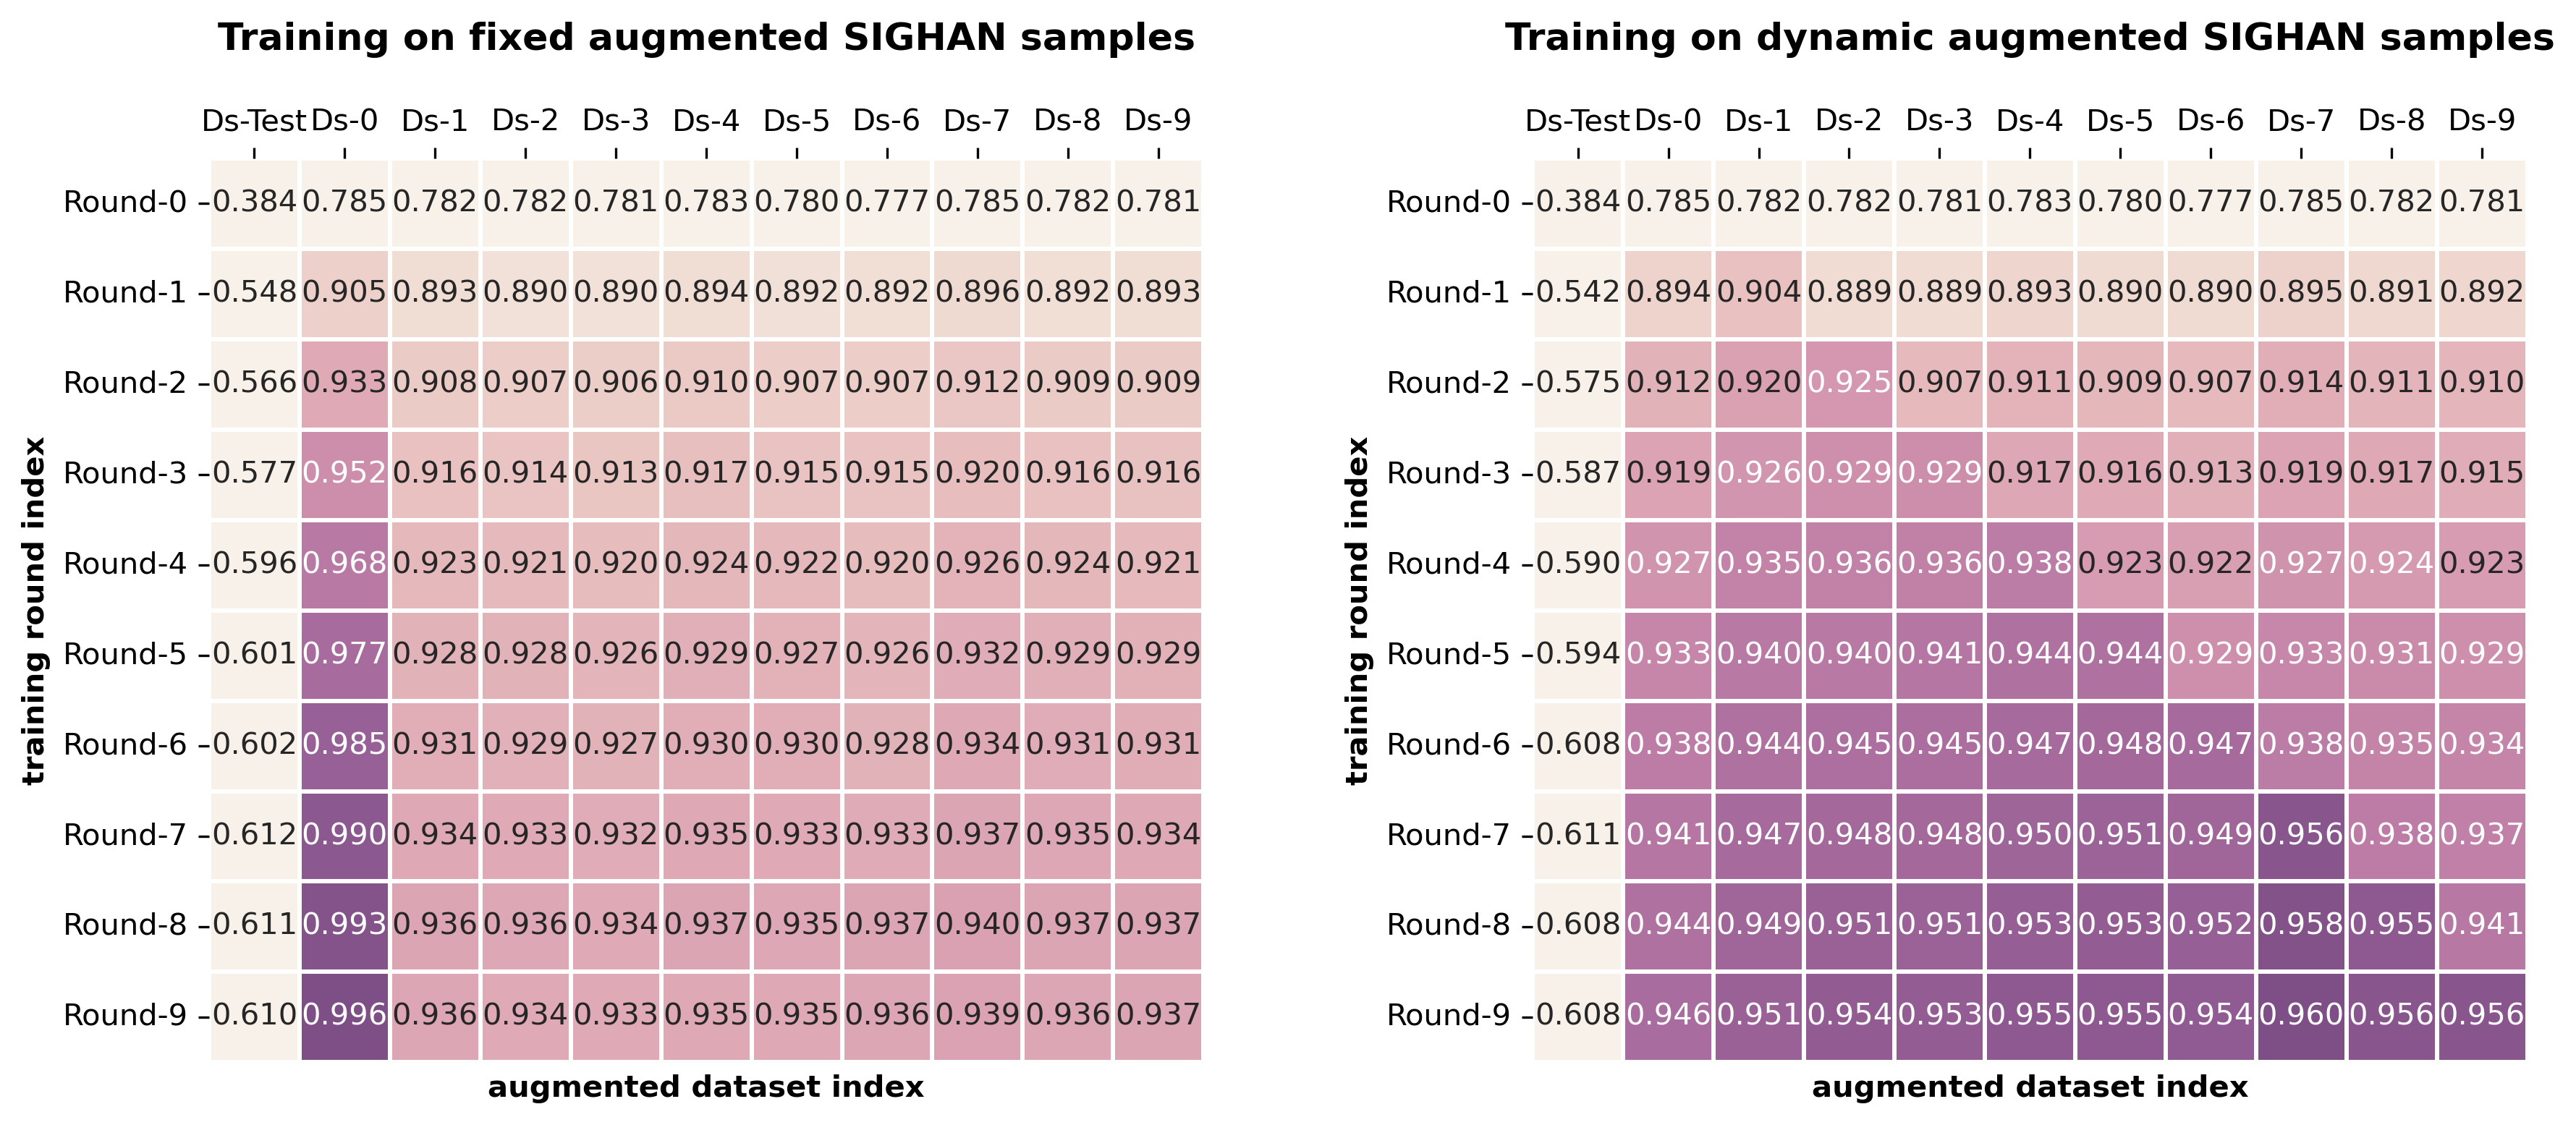

In [9]:
dataset_name = 'sighan'
model_prefix = 'smb'


titles = [
    f'Training on fixed augmented {dataset_name.upper()} samples',
    f'Training on dynamic augmented {dataset_name.upper()} samples',
]

paths = [
    f'/home/chendian/BBCM/checkpoints/{model_prefix}_{dataset_name}_fixP_sameseed/dynamic_training.log',
    f'/home/chendian/BBCM/checkpoints/{model_prefix}_{dataset_name}_dynamicP_sameseed/dynamic_training.log',
]

heatmap_vmin = {'sighan': 0.875, 'bbcm': 0.918}

plt.figure(figsize=(12, 5), dpi=300)
plt.figure(1)
add_blank_column = False
for idx, dt_log_path in enumerate(paths):
    if not os.path.exists(dt_log_path):
        continue
    arr, mask = get_heatmap_arr(dt_log_path, method='asc')
    ax = plt.subplot(1, 2, idx+1)
    xtick_labels = ['Ds-Test'] + [f'Ds-{di}' for di in range(min(10, arr.shape[1]-1))]
    ytick_labels = [f'Round-{di}' for di in range(10)]
    if add_blank_column:
        arr = np.insert(arr, 1, values=np.zeros([1, 10]), axis=1)
        mask = np.insert(mask, 1, values=np.ones([1, 10], dtype=np.bool_), axis=1)
        xtick_labels.insert(1, '')
    sns.heatmap(arr, cmap=cmap, ax=ax, cbar=False, 
                vmin=heatmap_vmin[dataset_name],
                xticklabels=xtick_labels, yticklabels=ytick_labels,
                square=True, linecolor='white', linewidths=1,
                mask=mask, annot=True, fmt=".3f")
    ax.xaxis.tick_top()
    ax.set_title(titles[idx], fontdict={'weight': 'bold', 'size': 12.5}, y=1.1)
    ax.set_xlabel('augmented dataset index', fontdict={'weight': 'bold'})
    ax.set_ylabel('training round index', fontdict={'weight': 'bold'})

plt.tight_layout(pad=0.2, w_pad=2.0, h_pad=2.0)
plt.savefig(f'./figures/fix_vs_dynamic_training_heatmap_{model_prefix}_{dataset_name}_210914.jpg', bbox_inches='tight')
plt.show()

In [ ]:
ax = plt.subplot(122)
cmap = sns.cubehelix_palette(
    start=0.17, gamma=0.5, light=.9, as_cmap=True)
# plt.yticks(rotation=90)
plt.figure(dpi=300)
ax.set_xlabel('Dataset Index')
# ax.xaxis.set_label_position('top')
sns.heatmap(arr, cmap=cmap, ax=ax, cbar=True, vmin=0.9,
            xticklabels=[f'Ds-{di}' for di in range(10)] + ['Ds-Test'],
            yticklabels=[f'Round-{di}' for di in range(10)],
            square=True, linecolor='white', linewidths=1,
            mask=mask,
            annot=True, fmt=".3f")
ax.xaxis.tick_top()

In [38]:
plt.tight_layout(pad=0.2, w_pad=0.0, h_pad=1.0)
plt.show()

<Figure size 432x288 with 0 Axes>